<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
pd.options.mode.copy_on_write = True 
#Importation de la librairie re (regular expressions)
import re
#Importation de la librairie Matplotlib
import matplotlib.pyplot as plt
#Importation de la librairie Seaborn
import seaborn as sns
#Importation de la librairie Numpy
import numpy as np

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')


#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')


#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print(population.shape)
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

(1416, 3)
Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [4]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
print(population.dtypes)
print(population.count())
print(population.nunique())
#Le nombre de valeurs présentes dans chacune des colonnes

Zone       object
Année       int64
Valeur    float64
dtype: object
Zone      1416
Année     1416
Valeur    1416
dtype: int64
Zone       236
Année        6
Valeur    1413
dtype: int64


In [5]:
#Affichage les 5 premières lignes de la table

population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur']*1000


In [7]:
#changement du nom de la colonne Valeur par Population
population = population.rename(columns={'Valeur': 'Population'})

In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications

population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
dispo_alimentaire.shape

(15605, 18)

In [10]:
#Consulter le nombre de colonnes
dispo_alimentaire.shape[1]

18

In [11]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [12]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0, inplace=True)
dispo_alimentaire

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
colonnes_a_modifier = ['Aliments pour animaux', 'Autres Utilisations','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Pertes','Production','Semences','Traitement','Variation de stock']
dispo_alimentaire[colonnes_a_modifier] = dispo_alimentaire[colonnes_a_modifier].apply(lambda x: x * 1000000)

In [14]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [15]:
#Afficher les dimensions du dataset
aide_alimentaire.shape

(1475, 4)

In [16]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau comporte 4 colonne(s)


In [17]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [18]:
#changement du nom de la colonne Pays bénéficiaire par Zone
#aide_alimentaire.columns = ['Zone', 'Année', 'Produit', 'Valeur']
aide_alimentaire = aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'})
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [19]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur']= aide_alimentaire['Valeur']*1000

In [20]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [21]:
#Afficher les dimensions du dataset
sous_nutrition.shape

(1218, 3)

In [22]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau comporte 3 colonne(s)


In [23]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [24]:
#Conversion de la colonne sous nutrition en numérique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')

In [25]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition.fillna(0, inplace=True)
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [26]:
#changement du nom de la colonne Valeur par sous_nutrition
#sous_nutrition.columns = ['Zone', 'Année', 'sous_nutrition']
sous_nutrition = sous_nutrition.rename(columns={"Valeur": "sous_nutrition"})
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [27]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition'] = sous_nutrition['sous_nutrition']*1000000

In [28]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


In [29]:
print(sous_nutrition.dtypes)

Zone               object
Année              object
sous_nutrition    float64
dtype: object


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [30]:
#Pour faire la jointure on a besoin de modifier la colonne Année de sous_nutrition pour qu'elle soit de la même forme 
#que celle de population cad une année et non un interval d'années
#Cette fonction prend en argument une expression qui correspond à un interval d'années et en calcule la moyenne
def moyenne_annees(intervalle):
    # Utilisation d'une expression régulière pour extraire les années
    annees = re.findall(r'\d{4}', intervalle)
    # Conversion des années en entiers
    annees = [int(annee) for annee in annees]
    # Calcul de la moyenne des années
    moyenne = sum(annees) / len(annees)
    return int(moyenne)
sous_nutrition['Année'] = sous_nutrition['Année'].apply(lambda x: moyenne_annees(x))
print(sous_nutrition.dtypes)
sous_nutrition.head()


Zone               object
Année               int64
sous_nutrition    float64
dtype: object


,Zone,Année,sous_nutrition
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0


In [31]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017

pop_sous_nutrition = pd.merge(population, sous_nutrition, on=['Zone', 'Année'], how='inner') #jointure

pop_sous_nutrition_2017 = pop_sous_nutrition[pop_sous_nutrition['Année'] == 2017]#filtre sur l'année 2017
pop_sous_nutrition_2017.head()

,Zone,Année,Population,sous_nutrition
4,Afghanistan,2017,36296113.0,10500000.0
10,Afrique du Sud,2017,57009756.0,3100000.0
16,Albanie,2017,2884169.0,100000.0
22,Algérie,2017,41389189.0,1300000.0
28,Allemagne,2017,82658409.0,0.0


In [32]:
#Ajout colonne Perc_sous_nutrition
pop_sous_nutrition_2017['Perc_sous_nutrition']=(pop_sous_nutrition_2017['sous_nutrition']/pop_sous_nutrition_2017['Population'])*100

In [33]:
#Calcul et affichage du nombre de personnes en état de sous nutrition

nb_sous_nutrition =round(pop_sous_nutrition_2017['sous_nutrition'].sum())#Somme la colonne sous_nutrition: Nb de personne en sous_nutrition
nb_population_total= pop_sous_nutrition_2017['Population'].sum()#Somme la colonne population
pro_sous_nutrition=round((nb_sous_nutrition/nb_population_total)*100,2)#Calcule de la proportion de personne en sous_nutrition

print('Nb de personnes en état de sous-nutrition: {} personnes'.format(nb_sous_nutrition))
print('Pourcentage de personnes en état de sous-nutrition: {}%'.format(pro_sous_nutrition))



Nb de personnes en état de sous-nutrition: 535700000 personnes
Pourcentage de personnes en état de sous-nutrition: 7.1%


In [34]:
print('Nb d\'habitant en France en 2017: 66,920,000 personnes')
comparaison_france_sous_nutrition =round((nb_sous_nutrition/66920000)*100,2)#Calcule du pourcentage de français qui serais en sous_nutrition par rapport à la sous_nutrition total
print('Répresentation du nb de personnes en sous_nutrtion à travers la population françaises:{}% soit 8 fois la population française'.format(comparaison_france_sous_nutrition))
pop_sous_nutrition_2017.head()


Nb d'habitant en France en 2017: 66,920,000 personnes
Répresentation du nb de personnes en sous_nutrtion à travers la population françaises:800.51% soit 8 fois la population française


,Zone,Année,Population,sous_nutrition,Perc_sous_nutrition
4,Afghanistan,2017,36296113.0,10500000.0,28.928718
10,Afrique du Sud,2017,57009756.0,3100000.0,5.437666
16,Albanie,2017,2884169.0,100000.0,3.467203
22,Algérie,2017,41389189.0,1300000.0,3.140917
28,Allemagne,2017,82658409.0,0.0,0.000000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [35]:
#Combien mange en moyenne un être humain ? 
#Perc femme -> 50%
#Perc homme -> 50%
#Perc adult -> 75%
#Perc enfant -> 25%
#Source =>  https://www.santemagazine.fr/alimentation/acheter-et-cuisiner/repas-equilibre/comment-calculer-vos-besoins-journaliers-en-calories-267433
#Source => https://www.ined.fr/fr/tout-savoir-population/memos-demo/faq/plus-hommes-ou-femmes-sur-terre/#:~:text=S'il%20y%20a%20%C3%A0,femmes%20(49%2C6%20%25).
#Enfants:1900
#Femme:2000
#Homme:2600 
#1900*0.25 + (2000*0.5+2600*0.5)*0.75 = 475+1725= 2200kcal

In [36]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
pop_dispo_alimentaire = pd.merge(population, dispo_alimentaire, on='Zone', how='inner')#jointure
pop_dispo_alimentaire_2017 = pop_dispo_alimentaire[pop_dispo_alimentaire['Année'] == 2017]#filtre sur l'année 2017


In [37]:
#Affichage du nouveau dataframe
pop_dispo_alimentaire_2017.head()

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
240,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
241,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
242,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
243,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement pour l'année 2017
pop_dispo_alimentaire_2017['dispo_kcal']=pop_dispo_alimentaire_2017['Disponibilité alimentaire (Kcal/personne/jour)']*pop_dispo_alimentaire_2017['Population']*365

somme_kcal_dispo = round(pop_dispo_alimentaire_2017['dispo_kcal'].sum())#Nb de kcal dispo mondiale

pop_2017 = population[population['Année'] == 2017]
somme_pop_mondiale = round(pop_2017['Population'].sum())#Population total mondiale

kcal_dispo_par_pers= round(somme_kcal_dispo/somme_pop_mondiale)#kcal dispo par personne

print('Population mondiale: {}'.format(somme_pop_mondiale))
print('Kcal diponible par ans: {}'.format(somme_kcal_dispo))
print('Kcak diponible par personne par ans: {}'.format(kcal_dispo_par_pers))

Population mondiale: 7548134111
Kcal diponible par ans: 7635429388975815
Kcak diponible par personne par ans: 1011565


In [39]:
#Calcul du nombre d'humains pouvant être nourris

nb_pers_nourris = round(somme_kcal_dispo/2250/365)#Nb de personnes pouvant être nourries
perc_pers_nourris = round((nb_pers_nourris/somme_pop_mondiale)*100,2)#Pourcentage de personnes pouvant être nourries

print('Nombre de personnes pouvant être nourries {}'.format(nb_pers_nourris))
print('Population mondiale: {}'.format(somme_pop_mondiale))
print('Pourcentage de personne pouvant être nourries {}%'.format(perc_pers_nourris))

Nombre de personnes pouvant être nourries 9297326501
Population mondiale: 7548134111
Pourcentage de personne pouvant être nourries 123.17%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [40]:
#Transfert des données avec les végétaux dans un nouveau dataframe

#récupération du data frame 3.2  + filtre de la colonne "origine" par "vegetale"
pop_dispo_alimentaire_2017_vegetaux = pop_dispo_alimentaire_2017[pop_dispo_alimentaire_2017['Origine'].str.contains('vegetale')]

print(pop_dispo_alimentaire_2017_vegetaux.shape)
pop_dispo_alimentaire_2017_vegetaux.head()

(11751, 21)


,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
241,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,1.324808e+10
242,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,1.324808e+10
243,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
244,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,5.299232e+10
246,Afghanistan,2017,36296113.0,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,...,3000000.0,0.0,3000000.0,3000000.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00


In [41]:
#Calcul du nombre de kcal disponible pour les végétaux

somme_kcal_dispo_vegetaux = round(pop_dispo_alimentaire_2017_vegetaux['dispo_kcal'].sum())#Nb de kcal dispo mondiale (végétaux)

kcal_dispo_par_pers_vegetaux= round(somme_kcal_dispo_vegetaux/somme_pop_mondiale)#kcal dispo par personne (végétaux)

print('Population mondiale: {}'.format(somme_pop_mondiale))
print('Kcal diponible (végétaux): {}'.format(somme_kcal_dispo_vegetaux))
print('Kcak diponible par personne (végétaux): {}'.format(kcal_dispo_par_pers_vegetaux))

Population mondiale: 7548134111
Kcal diponible (végétaux): 6300178937197865
Kcak diponible par personne (végétaux): 834667


In [42]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux

nb_pers_nourris_vegetaux = round((somme_kcal_dispo_vegetaux/2250)/365)#Nb de personnes pouvant être nourries (végétaux)
perc_pers_nourris_vegetaux = round((nb_pers_nourris_vegetaux/somme_pop_mondiale)*100,2)#Pourcentage de personnes pouvant être nourries (végétaux)

print('Nombre de personnes pouvant être nourris avec des végétaux {}'.format(nb_pers_nourris_vegetaux))
print('Population mondiale: {}'.format(somme_pop_mondiale))
print('Pourcentage de personne pouvant être nourris avec des végétaux {}%'.format(perc_pers_nourris_vegetaux))

Nombre de personnes pouvant être nourris avec des végétaux 7671450761
Population mondiale: 7548134111
Pourcentage de personne pouvant être nourris avec des végétaux 101.63%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

Donner la part de l’alimentation humaine, animale et perdue (est-ce qu’on peut aussi calculer les autres ?) 
=> Graphique ?

Production + Importations - Exportations + Variation de stock = Disponibilité intérieur Disponibilité intérieur = Semences + Pertes + Nourriture + Aliments pour animaux + Traitement + Autres utilisations

In [43]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#Calcul de la disponibilité totale

dispo_total = round(dispo_alimentaire['Disponibilité intérieure'].sum())
print('Disponibilité total: {}'.format(dispo_total))

Disponibilité total: 9848994000000


In [45]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
liste_utilisation= ['Nourriture','Pertes','Aliments pour animaux']
for valeur in (liste_utilisation):
    print('Disponibilité: {} : {}Kg'.format(valeur, round(dispo_alimentaire[valeur].sum())))

Disponibilité: Nourriture : 4876258000000Kg
Disponibilité: Pertes : 453698000000Kg
Disponibilité: Aliments pour animaux : 1304245000000Kg


In [46]:
#même chose mais calcule des pourcentages
for valeur in (liste_utilisation):
    print('Pourcentage disponibilité: {} : {}%'.format(valeur, round((dispo_alimentaire[valeur].sum()/dispo_total)*100)))

Pourcentage disponibilité: Nourriture : 50%
Pourcentage disponibilité: Pertes : 5%
Pourcentage disponibilité: Aliments pour animaux : 13%


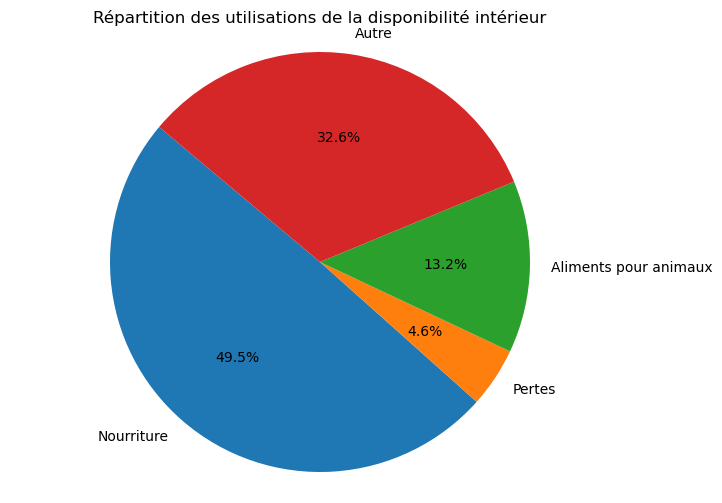

In [47]:
#Réalisation du graphique

# Définition des données
valeurs = [4876258000000, 453698000000, 1304245000000]
categories = ['Nourriture', 'Pertes', 'Aliments pour animaux']
total = 9848994000000

# Calcul de la partie manquante
partie_manquante = total - sum(valeurs)
valeurs.append(partie_manquante)
categories.append('Autre')

# Calcul des pourcentages
pourcentages = [(v / total) * 100 for v in valeurs]

# Création du graphique
plt.figure(figsize=(8, 6))
plt.pie(pourcentages, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title("Répartition des utilisations de la disponibilité intérieur")
plt.axis('equal')  # Pour que le camembert soit un cercle
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [48]:
#Création d'une liste avec toutes les variables
cereales=['Blé','Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales', 'Autres']

In [49]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
dispo_alimentaire_cereales = dispo_alimentaire[dispo_alimentaire['Produit'].isin(cereales)]#filtre de la colonne "Produit"
dispo_alimentaire_cereales.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0
47,Afghanistan,Riz (Eq Blanchi),vegetale,0.0,0.0,141.0,13.82,0.27,2.70,4.610000e+08,0.0,1.190000e+08,4.220000e+08,24000000.0,3.420000e+08,14000000.0,0.0,0.0


In [50]:
#Affichage de la proportion d'alimentation animale (céréales)

dispo_aliments_animaux = round(dispo_alimentaire_cereales['Aliments pour animaux'].sum())
dispo_aliments_total = round(dispo_alimentaire_cereales['Disponibilité intérieure'].sum())
proportion_aliments_animaux = round((dispo_aliments_animaux/dispo_aliments_total)*100,2)

print('Disponibilité total des végétaux: {}Kg'.format(dispo_aliments_total))

print('Utilisation végétaux pour l\'alimentation des animaux: {}Kg'.format(dispo_aliments_animaux))
print('Pourcentage de l\'utilisation des végétaux pour l\'alimentation des animaux: {}%'.format(proportion_aliments_animaux))

Disponibilité total des végétaux: 2379514000000Kg
Utilisation végétaux pour l'alimentation des animaux: 854500000000Kg
Pourcentage de l'utilisation des végétaux pour l'alimentation des animaux: 35.91%


In [51]:
#Affichage de la proportion d'alimentation humaine (céréales)

dispo_aliments_humaine = round(dispo_alimentaire_cereales['Nourriture'].sum())
proportion_aliments_humaine = round((dispo_aliments_humaine/dispo_aliments_total)*100,2)

print('Utilisation végétaux pour l\'alimentation humaine: {}Kg'.format(dispo_aliments_humaine))
print('Pourcentage de l\'utilisation des végétaux pour l\'alimentation humaine: {}%'.format(proportion_aliments_humaine))

Utilisation végétaux pour l'alimentation humaine: 1023686000000Kg
Pourcentage de l'utilisation des végétaux pour l'alimentation humaine: 43.02%


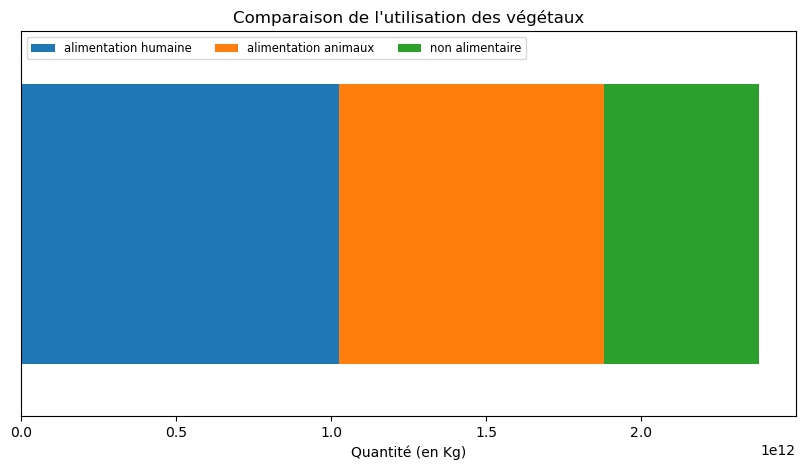

In [52]:
#Partie graphique
x = "disponibilite_totale"
utilisation_animaux = 854500000000
utilisation_humaine = 1023686000000
autre = 2379514000000 - 1023686000000 - 854500000000
pourcentage = ["43.02%","35.91%","21.07%"]
mise_en_forme = utilisation_animaux+utilisation_humaine + autre +1
# Données d'exemple




# Création du graphique à barres empilées
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.barh(x, mise_en_forme, height=1, color="white")
ax.barh(x, utilisation_humaine, label="alimentation humaine")
ax.barh(x, utilisation_animaux, left=utilisation_humaine, label="alimentation animaux")
a = ax.barh(x, autre, left=np.array(utilisation_humaine) + np.array(utilisation_animaux), label="non alimentaire")
#ax.bar_label(a,labels="21%", label_type='center', color="blue")
ax.invert_yaxis()
ax.yaxis.set_visible(False)

#width = 400
# Configuration des axes

ax.set_xlabel("Quantité (en Kg)")
#ax.set_ylabel("Variable Y")
ax.set_title("Comparaison de l\'utilisation des végétaux")
ax.legend(ncols=10,bbox_to_anchor=(0, 1),loc='upper left', fontsize='small')

# Affichage de la figure (surtout utile, si MPL est utilisé de manière standalone)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [53]:
#Création de la colonne proportion par pays
pop_sous_nutrition = pd.merge(population, sous_nutrition, on=['Zone', 'Année'], how='inner')#jointure

pop_sous_nutrition_2017 = pop_sous_nutrition[pop_sous_nutrition['Année'] == 2017]#filtre colonne année 

pop_sous_nutrition_2017['Perc_sous_nutrition']= round((pop_sous_nutrition_2017['sous_nutrition']/pop_sous_nutrition_2017['Population'])*100,2)
pop_sous_nutrition_2017 = pop_sous_nutrition_2017.sort_values(by= 'Perc_sous_nutrition',ascending=False)#order by perc_sous_nutrition
pop_sous_nutrition_2017.head()

,Zone,Année,Population,sous_nutrition,Perc_sous_nutrition
472,Haïti,2017,10982366.0,5300000.0,48.26
946,République populaire démocratique de Corée,2017,25429825.0,12000000.0,47.19
652,Madagascar,2017,25570512.0,10500000.0,41.06
622,Libéria,2017,4702226.0,1800000.0,38.28
604,Lesotho,2017,2091534.0,800000.0,38.25


In [54]:
#affichage après trie des 10 pires pays
top10_pop_sous_nutrition_2017 = pop_sous_nutrition_2017.head(10)
top10_pop_sous_nutrition_2017 = top10_pop_sous_nutrition_2017.reset_index()
top10_pop_sous_nutrition_2017

,index,Zone,Année,Population,sous_nutrition,Perc_sous_nutrition
0,472,Haïti,2017,10982366.0,5300000.0,48.26
1,946,République populaire démocratique de Corée,2017,25429825.0,12000000.0,47.19
2,652,Madagascar,2017,25570512.0,10500000.0,41.06
3,622,Libéria,2017,4702226.0,1800000.0,38.28
4,604,Lesotho,2017,2091534.0,800000.0,38.25
5,1102,Tchad,2017,15016753.0,5700000.0,37.96
6,970,Rwanda,2017,11980961.0,4200000.0,35.06
7,730,Mozambique,2017,28649018.0,9400000.0,32.81
8,1120,Timor-Leste,2017,1243258.0,400000.0,32.17
9,4,Afghanistan,2017,36296113.0,10500000.0,28.93


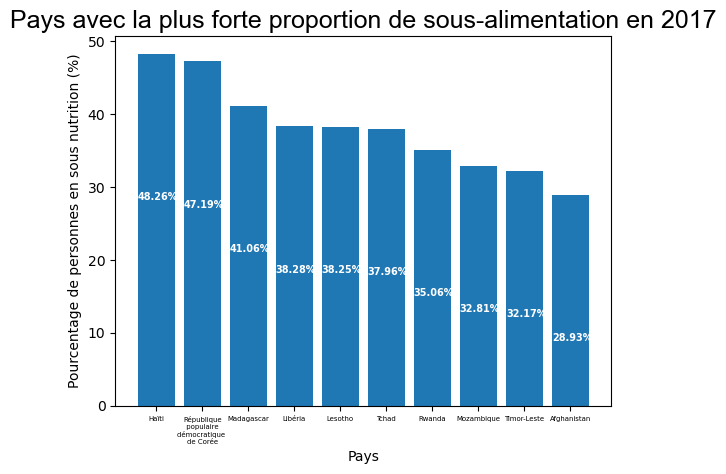

In [55]:
#Parie graphique

top10_pop_sous_nutrition_2017.at[1, 'Zone'] = "République\n populaire \ndémocratique \nde Corée"

plt.bar(top10_pop_sous_nutrition_2017['Zone'],top10_pop_sous_nutrition_2017['Perc_sous_nutrition'])
plt.tick_params(axis='x', labelsize=5)

plt.xlabel("Pays")
plt.ylabel("Pourcentage de personnes en sous nutrition (%)")
plt.title("Pays avec la plus forte proportion de sous-alimentation en 2017", fontname='Arial', fontsize=18)

valeur=top10_pop_sous_nutrition_2017['Perc_sous_nutrition'].tolist()
for i in range(10):
    plt.text(i-0.4,valeur[i]-20,str(valeur[i]) + "%",fontsize=7, color="white", fontweight='bold')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [56]:
#calcul du total de l'aide alimentaire par pays
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


In [57]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
top_aide_alimentaire = aide_alimentaire.groupby('Zone')['Valeur'].sum()
top_aide_alimentaire = top_aide_alimentaire.reset_index()
top_aide_alimentaire = top_aide_alimentaire.sort_values(by='Valeur',ascending=False)
top_aide_alimentaire.head(10)

,Zone,Valeur
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [58]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
evol_aide_alimentaire = aide_alimentaire.groupby(['Zone', 'Année'])
evol_aide_alimentaire = evol_aide_alimentaire['Valeur'].sum()
evol_aide_alimentaire = evol_aide_alimentaire.reset_index()
#evol_aide_alimentaire = pd.DataFrame(evol_aide_alimentaire)
evol_aide_alimentaire.head()

,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000


In [59]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
liste_top_aide_alimentaire=['République arabe syrienne','Éthiopie','Yémen','Soudan du Sud','Soudan']

In [60]:
#On filtre sur le dataframe avec notre liste
top_evol_aide_alimentaire = evol_aide_alimentaire[evol_aide_alimentaire['Zone'].isin(liste_top_aide_alimentaire)]

top_evol_aide_alimentaire

,Zone,Année,Valeur
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000
190,Soudan,2014,321904000
191,Soudan,2015,17650000
192,Soudan du Sud,2013,196330000
193,Soudan du Sud,2014,450610000
194,Soudan du Sud,2015,48308000


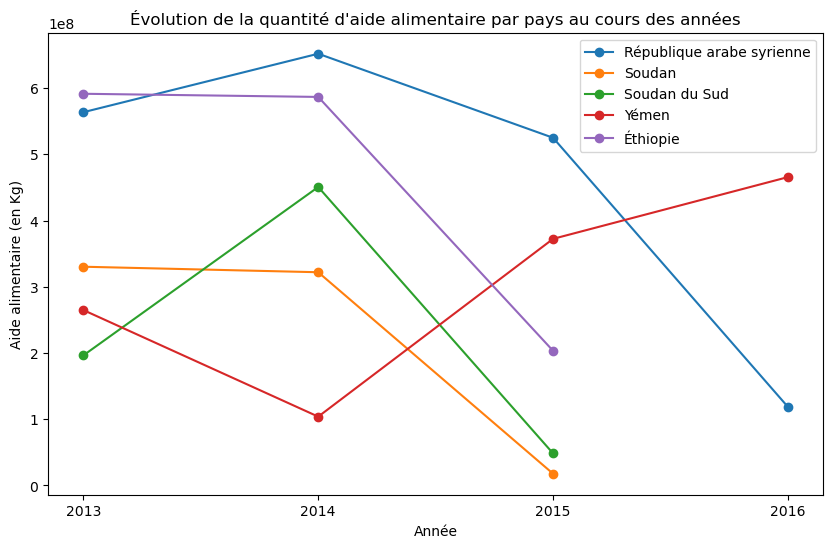

In [61]:
#Partie graphique

# Création du graphique empilé
plt.figure(figsize=(10, 6))
for zone, group in top_evol_aide_alimentaire.groupby('Zone'):
    plt.plot(group['Année'], group['Valeur'], marker='o', label=zone)

plt.title('Évolution de la quantité d\'aide alimentaire par pays au cours des années')
plt.xlabel('Année')

plt.xticks([2013, 2014, 2015, 2016])
plt.ylabel('Aide alimentaire (en Kg)')
plt.legend()
#plt.grid(True)

# Affichage du graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [62]:
pop_dispo_alimentaire_2017.head()

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
240,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,...,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,6.624041e+10
241,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,1.324808e+10
242,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,1.324808e+10
243,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
244,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,5.299232e+10


In [63]:
#Calcul de la disponibilité en kcal par personne par jour par pays

pop_dispo_alimentaire_pays = pop_dispo_alimentaire_2017.groupby(['Zone','Population'])
pop_dispo_alimentaire_pays = pop_dispo_alimentaire_pays['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
pop_dispo_alimentaire_pays = pop_dispo_alimentaire_pays.reset_index()
top_pop_dispo_alimentaire_pays = pop_dispo_alimentaire_pays.sort_values(by ='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False)





In [64]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
last_pop_dispo_alimentaire_pays = pop_dispo_alimentaire_pays.sort_values(by ='Disponibilité alimentaire (Kcal/personne/jour)')
last_pop_dispo_alimentaire_pays.head(10)

,Zone,Population,Disponibilité alimentaire (Kcal/personne/jour)
127,République centrafricaine,4596023.0,1879.0
164,Zambie,16853599.0,1924.0
91,Madagascar,25570512.0,2056.0
0,Afghanistan,36296113.0,2087.0
65,Haïti,10982366.0,2089.0
132,République populaire démocratique de Corée,25429825.0,2093.0
150,Tchad,15016753.0,2109.0
165,Zimbabwe,14236595.0,2113.0
114,Ouganda,41166588.0,2126.0
152,Timor-Leste,1243258.0,2129.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [65]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
top_pop_dispo_alimentaire_pays.head(10)

,Zone,Population,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,8819901.0,3770.0
16,Belgique,11419748.0,3737.0
157,Turquie,81116450.0,3708.0
169,États-Unis d'Amérique,325084756.0,3682.0
74,Israël,8243848.0,3610.0
72,Irlande,4753279.0,3602.0
75,Italie,60673701.0,3578.0
89,Luxembourg,591910.0,3540.0
166,Égypte,96442591.0,3518.0
4,Allemagne,82658409.0,3503.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [66]:

thaïlande = pd.merge(population, sous_nutrition, on = ['Zone', 'Année'], how='inner')
thaïlande = pd.merge(thaïlande, dispo_alimentaire, on = ['Zone'], how='inner')
thaïlande = thaïlande.loc[(thaïlande['Année'] == 2017) & (thaïlande['Zone'] == "Thaïlande"), :]
thaïlande.head()

,Zone,Année,Population,sous_nutrition,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
85076,Thaïlande,2017,69209810.0,6200000.0,Abats Comestible,animale,0.0,0.0,3.0,1.11,...,0.56,74000000.0,5.000000e+06,33000000.0,75000000.0,0.0,4.500000e+07,0.0,0.0,0.0
85077,Thaïlande,2017,69209810.0,6200000.0,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,...,0.00,8000000.0,6.000000e+06,2000000.0,6000000.0,0.0,1.200000e+07,0.0,2000000.0,0.0
85078,Thaïlande,2017,69209810.0,6200000.0,"Alcool, non Comestible",vegetale,0.0,358000000.0,0.0,0.00,...,0.00,358000000.0,1.100000e+08,21000000.0,0.0,0.0,4.470000e+08,0.0,0.0,0.0
85079,Thaïlande,2017,69209810.0,6200000.0,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,...,0.08,12000000.0,7.000000e+06,19000000.0,12000000.0,0.0,0.000000e+00,0.0,0.0,0.0
85080,Thaïlande,2017,69209810.0,6200000.0,Ananas,vegetale,0.0,0.0,10.0,10.02,...,0.08,782000000.0,1.449000e+09,9000000.0,671000000.0,110000000.0,2.209000e+09,0.0,0.0,13000000.0


In [67]:
#Calcul de la sous nutrition en Thaïlande
sous_nutrition_thaïlande = (6200000/69209810)*100
print("Pourcentage de personnes en sous nutrition en Thaïlande: {}%".format(sous_nutrition_thaïlande))

Pourcentage de personnes en sous nutrition en Thaïlande: 8.958267621309753%



Production + Importations - Exportations + Variation de stock = Disponibilité intérieur
Disponibilité intérieur = Semences + Pertes + Nourriture + Aliments pour animaux + Traitement + Autres utilisations


In [68]:
# On calcule la proportion exportée en fonction de la proportion
thaïlande_manioc = thaïlande.loc[thaïlande['Produit'] == 'Manioc', :]
thaïlande_manioc.head()

,Zone,Année,Population,sous_nutrition,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
85126,Thaïlande,2017,69209810.0,6200000.0,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,...,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0


In [69]:
thaïlande_manioc_production = round(thaïlande_manioc.at[85126,"Production"])
print("Manioc produit en Thaïlande: {}Kg".format(thaïlande_manioc_production))
thaïlande_manioc_exportation = round(thaïlande_manioc.at[85126,"Exportations - Quantité"])
print("Manioc de Thaïlande exporté: {}Kg".format(thaïlande_manioc_exportation))
pro_exportation_production_manioc= round((thaïlande_manioc_exportation/thaïlande_manioc_production)*100,2)
print("Pourcentage de Manioc exporté par rapport à sa production dans le pays: {}%".format(pro_exportation_production_manioc))
dispo_habitant = round(871000000/69209810,2)
print("Disponibilité de Manioc en Thaïlande par habitant par an: {}Kg".format(dispo_habitant))

Manioc produit en Thaïlande: 30228000000Kg
Manioc de Thaïlande exporté: 25214000000Kg
Pourcentage de Manioc exporté par rapport à sa production dans le pays: 83.41%
Disponibilité de Manioc en Thaïlande par habitant par an: 12.58Kg


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [70]:
#Observation de l'évolution de la sous-nutrition pour les pays en soufrant le plus

In [71]:
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0


In [72]:
#Sélection du top 5 des pays avec le plus de personne sous-alimenté
liste_top_sous_nutrition=['Haïti','République populaire démocratique de Corée','Madagascar','Libéria','Lesotho']

top_sous_nutrition = sous_nutrition[sous_nutrition['Zone'].isin(liste_top_sous_nutrition)]

top_sous_nutrition

,Zone,Année,sous_nutrition
468,Haïti,2013,5100000.0
469,Haïti,2014,5100000.0
470,Haïti,2015,5100000.0
471,Haïti,2016,5200000.0
472,Haïti,2017,5300000.0
473,Haïti,2018,5400000.0
600,Lesotho,2013,300000.0
601,Lesotho,2014,500000.0
602,Lesotho,2015,800000.0
603,Lesotho,2016,800000.0


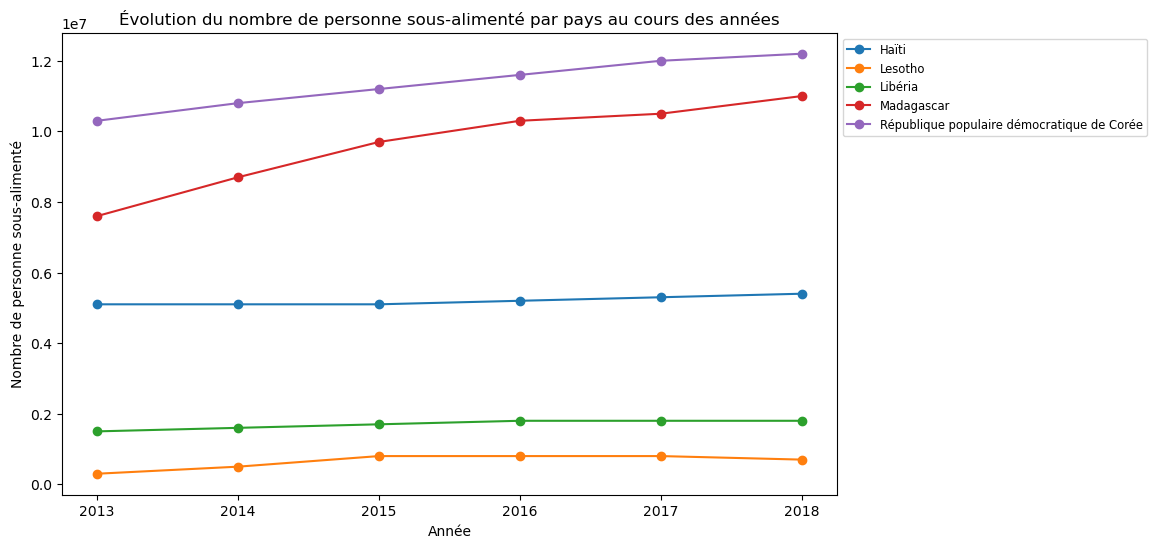

In [73]:
plt.figure(figsize=(10, 6))
for zone, group in top_sous_nutrition.groupby('Zone'):
    plt.plot(group['Année'], group['sous_nutrition'], marker='o', label=zone)

plt.title('Évolution du nombre de personne sous-alimenté par pays au cours des années')
plt.xlabel('Année')

plt.xticks([2013, 2014, 2015, 2016,2017,2018])
plt.ylabel('Nombre de personne sous-alimenté')

plt.legend(ncols=1, bbox_to_anchor=(1, 1), fontsize='small')
#plt.grid(True)

# Affichage du graphique
plt.show()